In [1]:
import acquire
from prepare import zillow_scale
from wrangle import acquire, prep, wrangle_zillow
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import plotly.express as px
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars
from scipy.stats import pearsonr, spearmanr

# Exercises

## As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
df = wrangle_zillow()
df

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,6037
2152858,4,3.0,2262,960756,2015,13494.52,6059
2152859,4,4.5,3127,536061,2014,6244.16,6059
2152861,3,2.5,1974,424353,2015,5302.70,6059


## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
train_and_validate, test = train_test_split(df, random_state=117)
train, validate = train_test_split(train_and_validate)

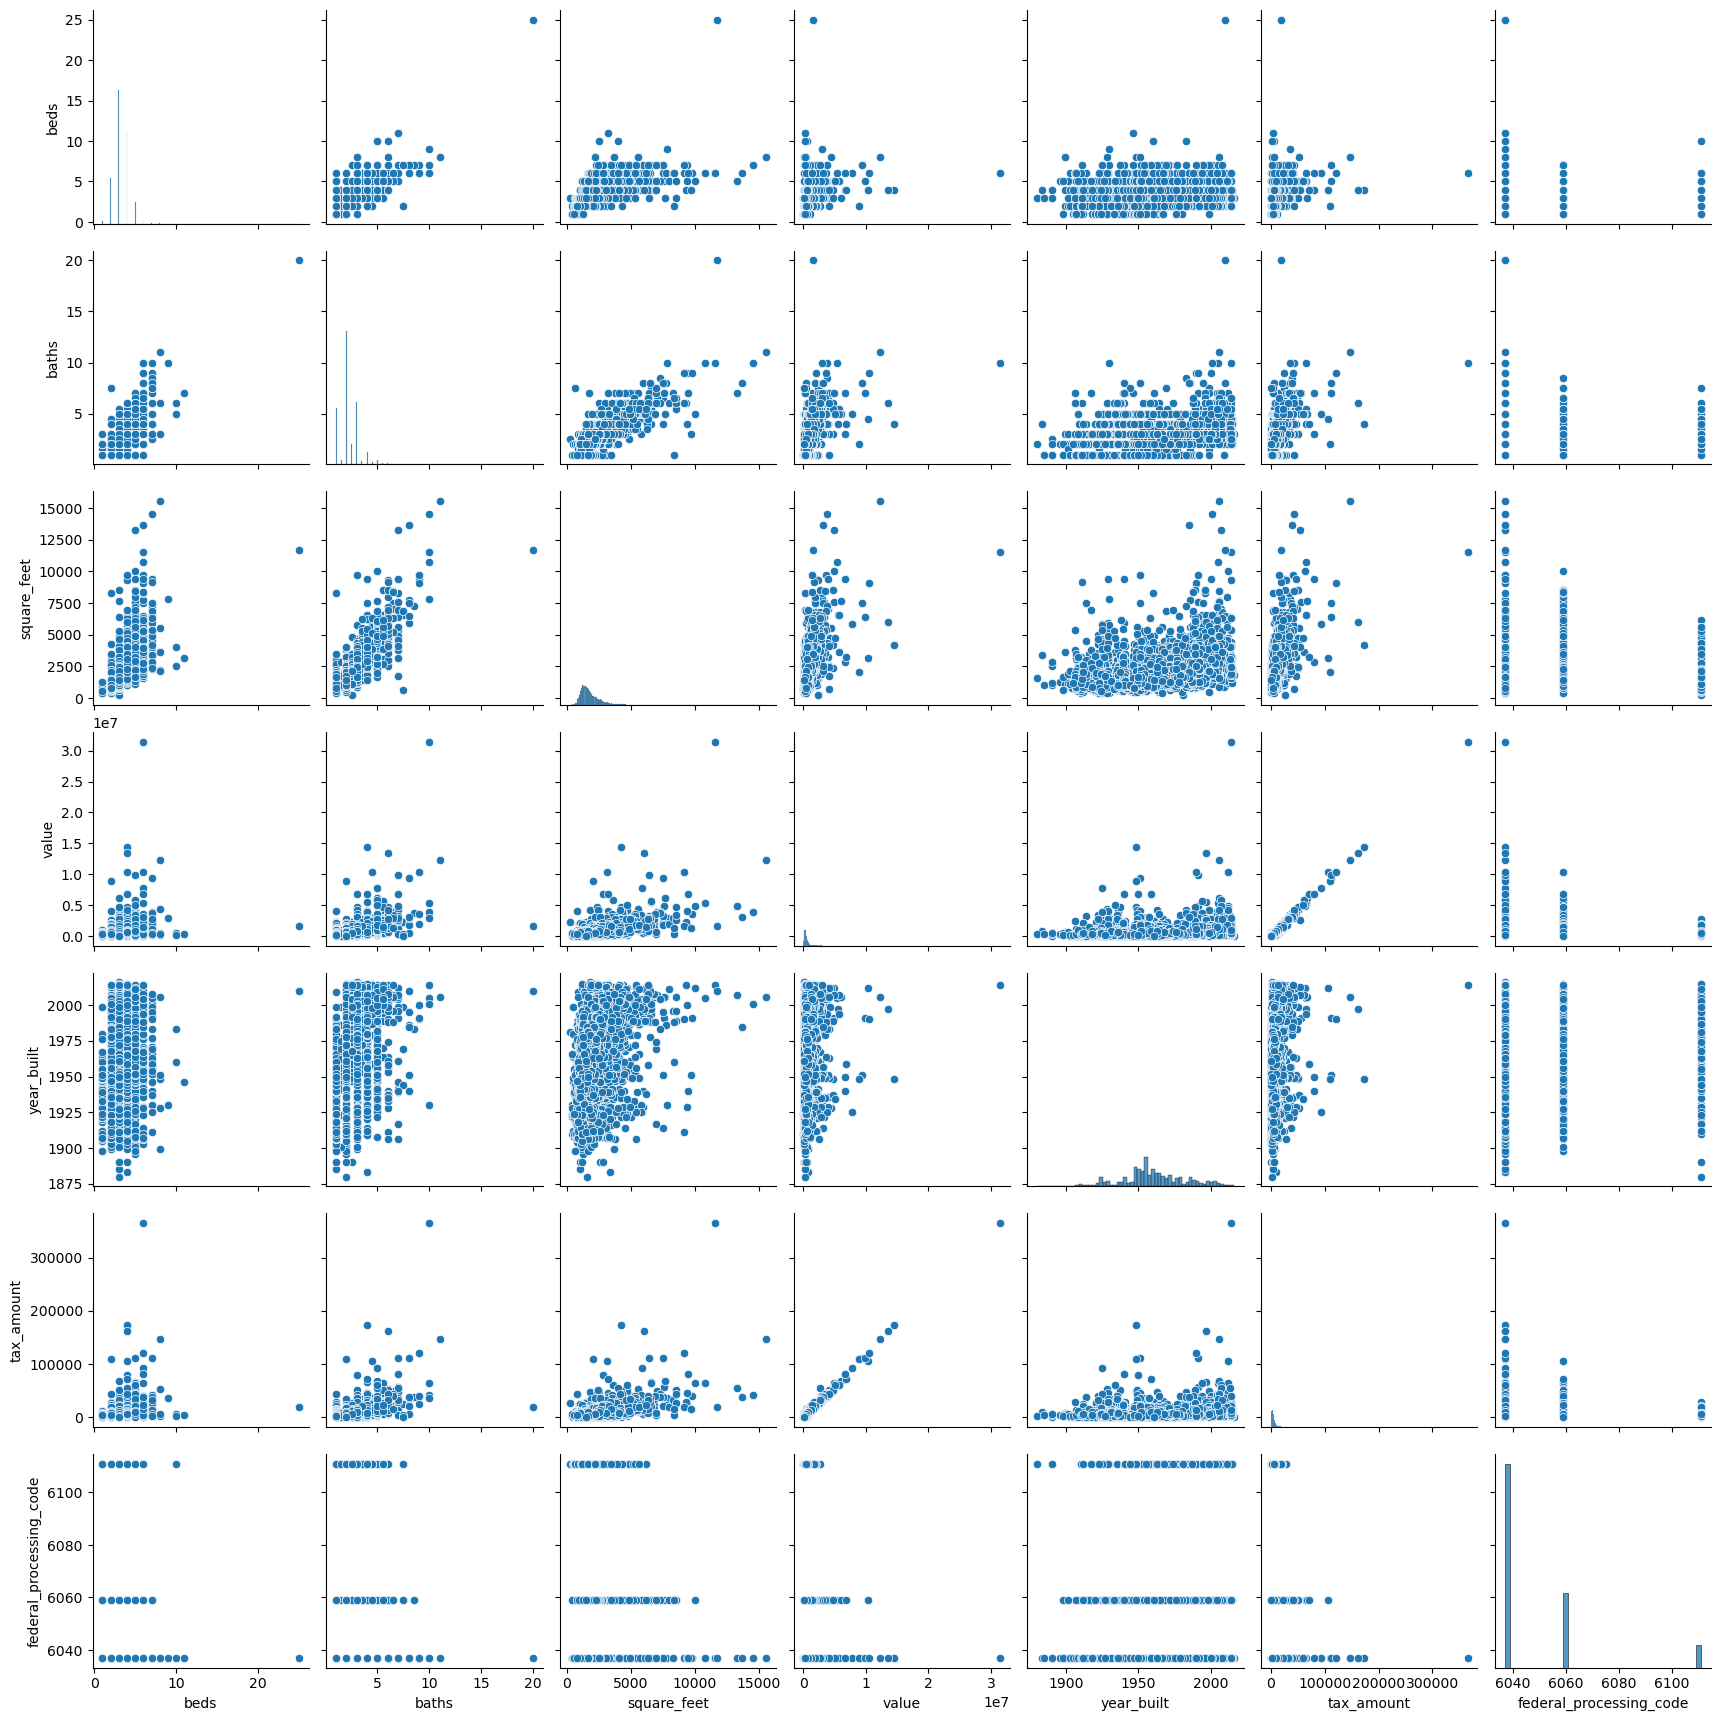

In [4]:
sns.pairplot(train.sample(10000))
plt.show()

In [5]:
value_corr = train.drop(columns=['federal_processing_code']).corr()
value_corr

,beds,baths,square_feet,value,year_built,tax_amount
beds,1.000000,0.640452,0.610535,0.255259,0.378447,0.255905
baths,0.640452,1.000000,0.839871,0.499876,0.512206,0.499264
square_feet,0.610535,0.839871,1.000000,0.604626,0.440171,0.601659
value,0.255259,0.499876,0.604626,1.000000,0.188142,0.992144
year_built,0.378447,0.512206,0.440171,0.188142,1.000000,0.189230
tax_amount,0.255905,0.499264,0.601659,0.992144,0.189230,1.000000


### The largest visual correlation present compared to value appears to be square feet
### Number of bathrooms is a close second

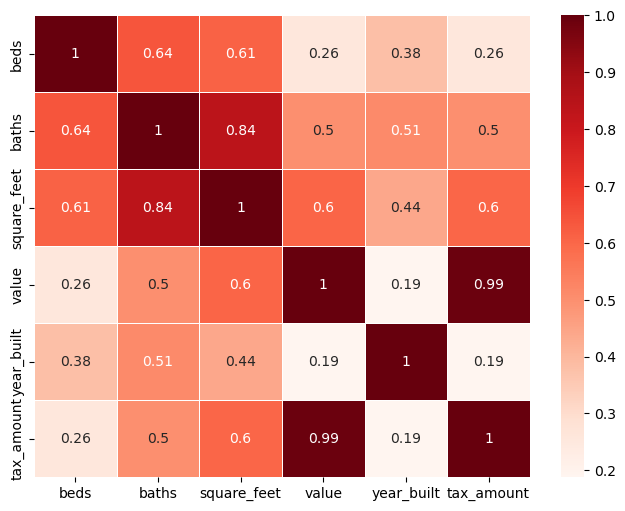

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(value_corr, cmap='Reds', annot=True, linewidth=0.5)
plt.show()

## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

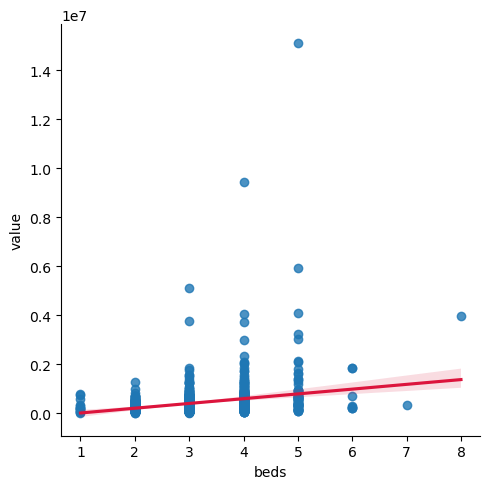

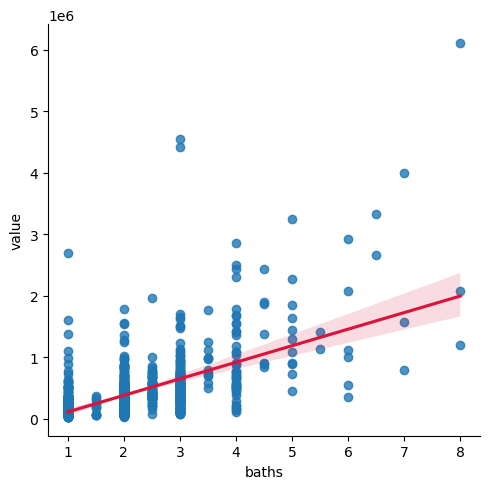

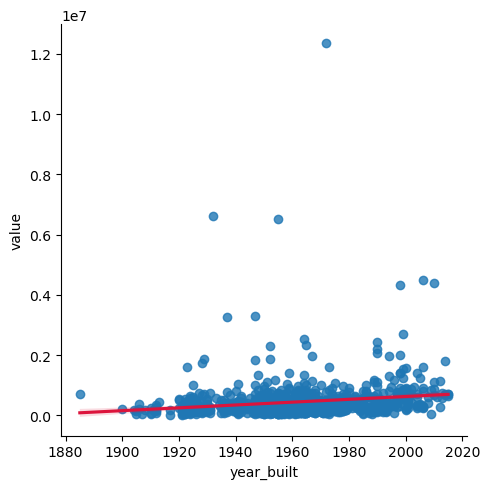

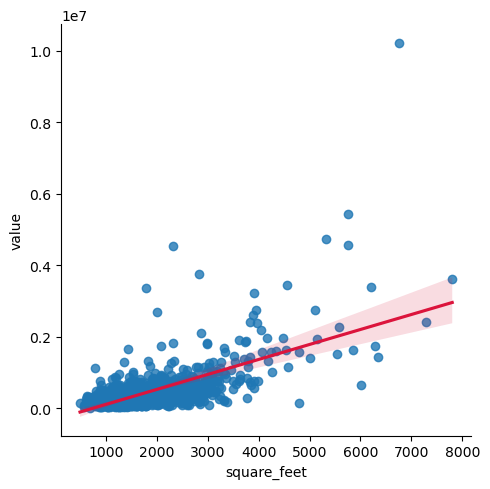

In [7]:
plot_variable_pairs(train)

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

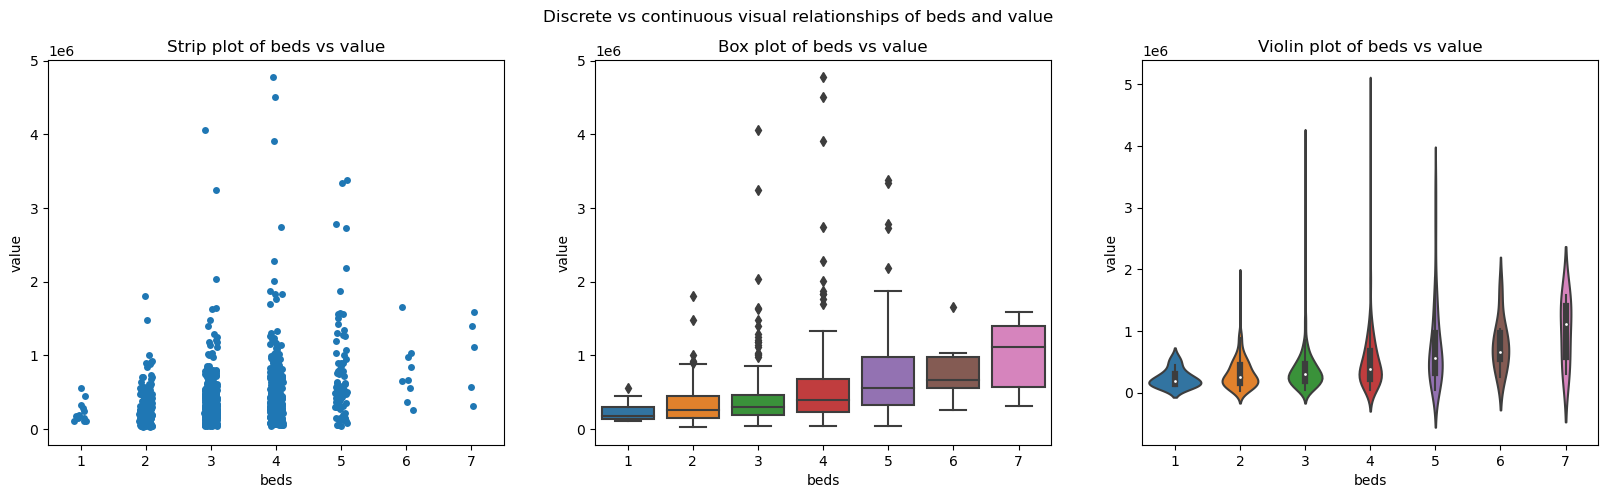

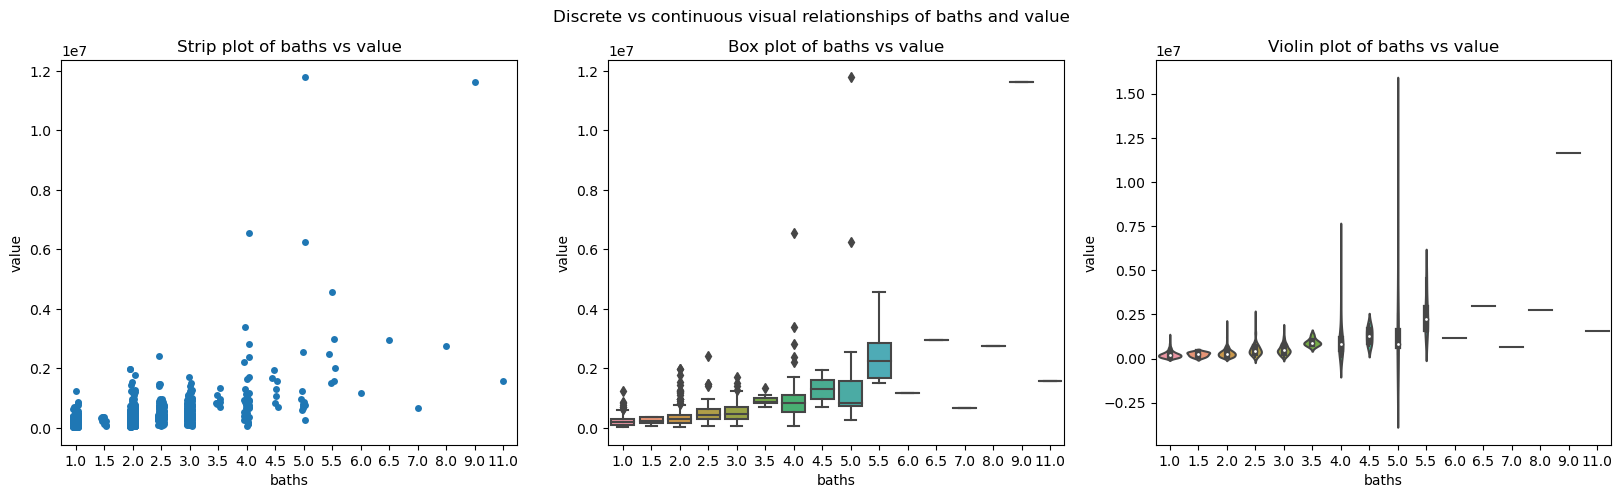

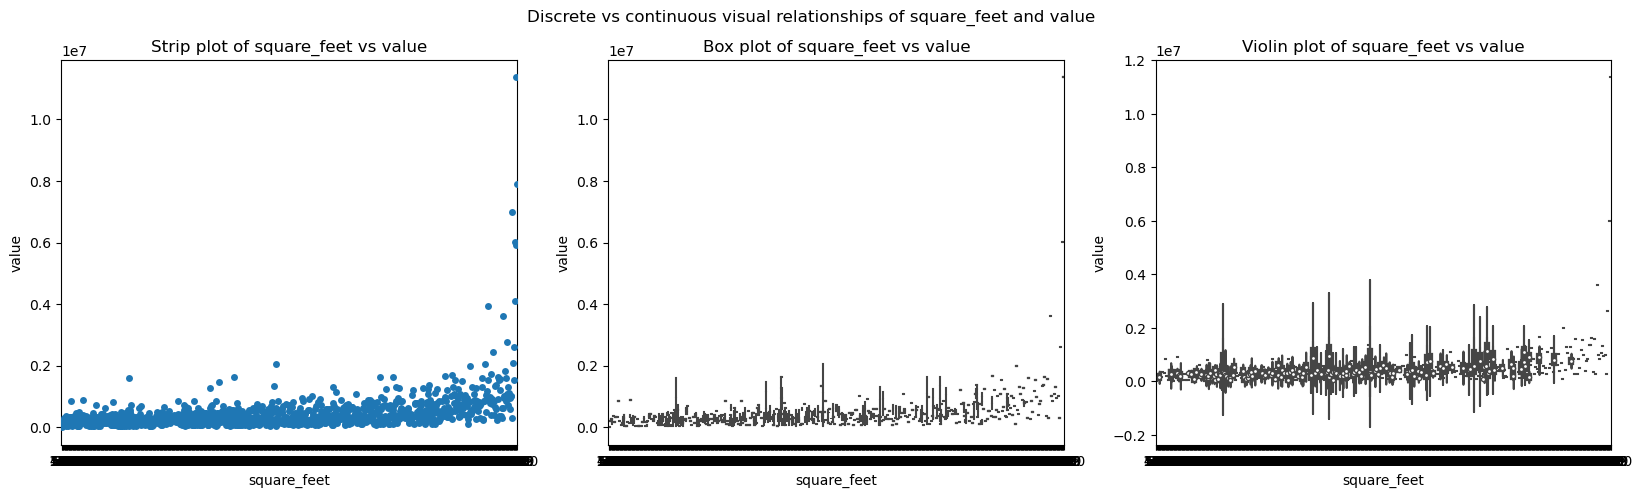

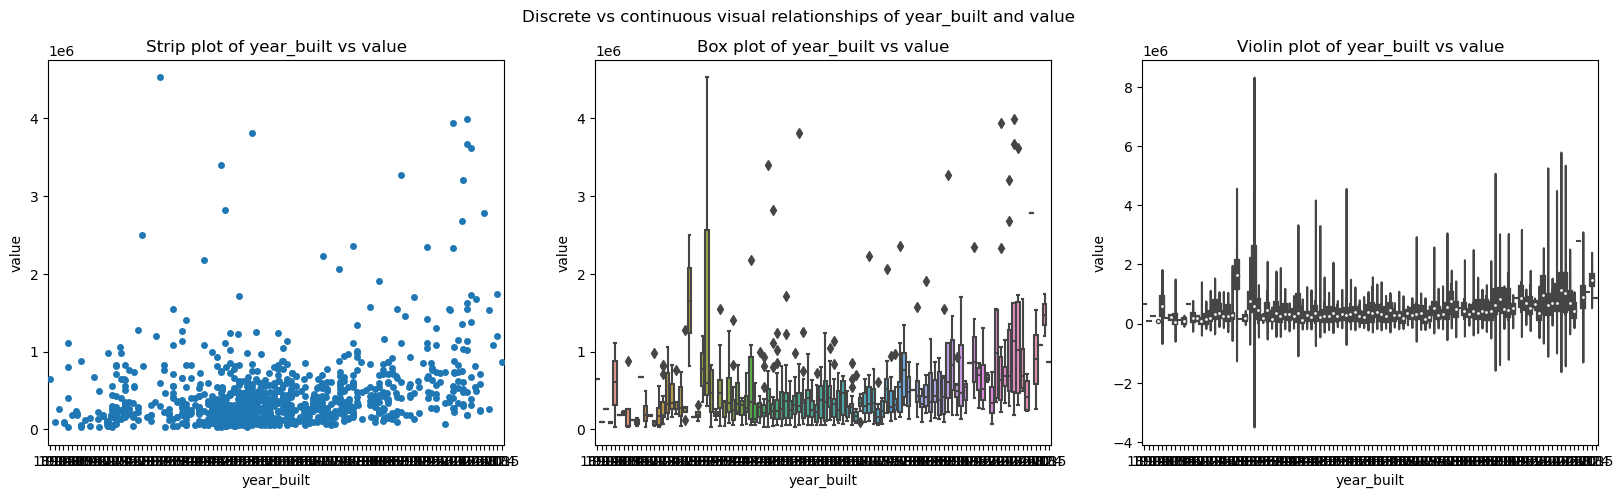

In [8]:
plot_categorical_and_continuous_vars('beds','value', train.sample(1000))
plot_categorical_and_continuous_vars('baths','value', train.sample(1000))
plot_categorical_and_continuous_vars('square_feet','value', train.sample(1000))
plot_categorical_and_continuous_vars('year_built','value', train.sample(1000))

## Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Done.

## Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

## Come up with some initial hypotheses based on your goal of predicting property value.

### Hypothesis 1: 
- H$_0$: There is no correlation between property value and the amount of square feet.
- H$_α$: There is a correlation between property value and the amount of square feet.

### Hypothesis 2: 
- H$_0$: There is no correlation between property value and how many bathrooms a house has.
- H$_α$: There is a correlation between property value and how many bathrooms a house has.

### Hypothesis 3: 
- H$_0$: There is no correlation between property value and how many bedrooms a house has.
- H$_α$: There is a correlation between property value and how many bedrooms a house has.

## Visualize all combinations of variables in some way.

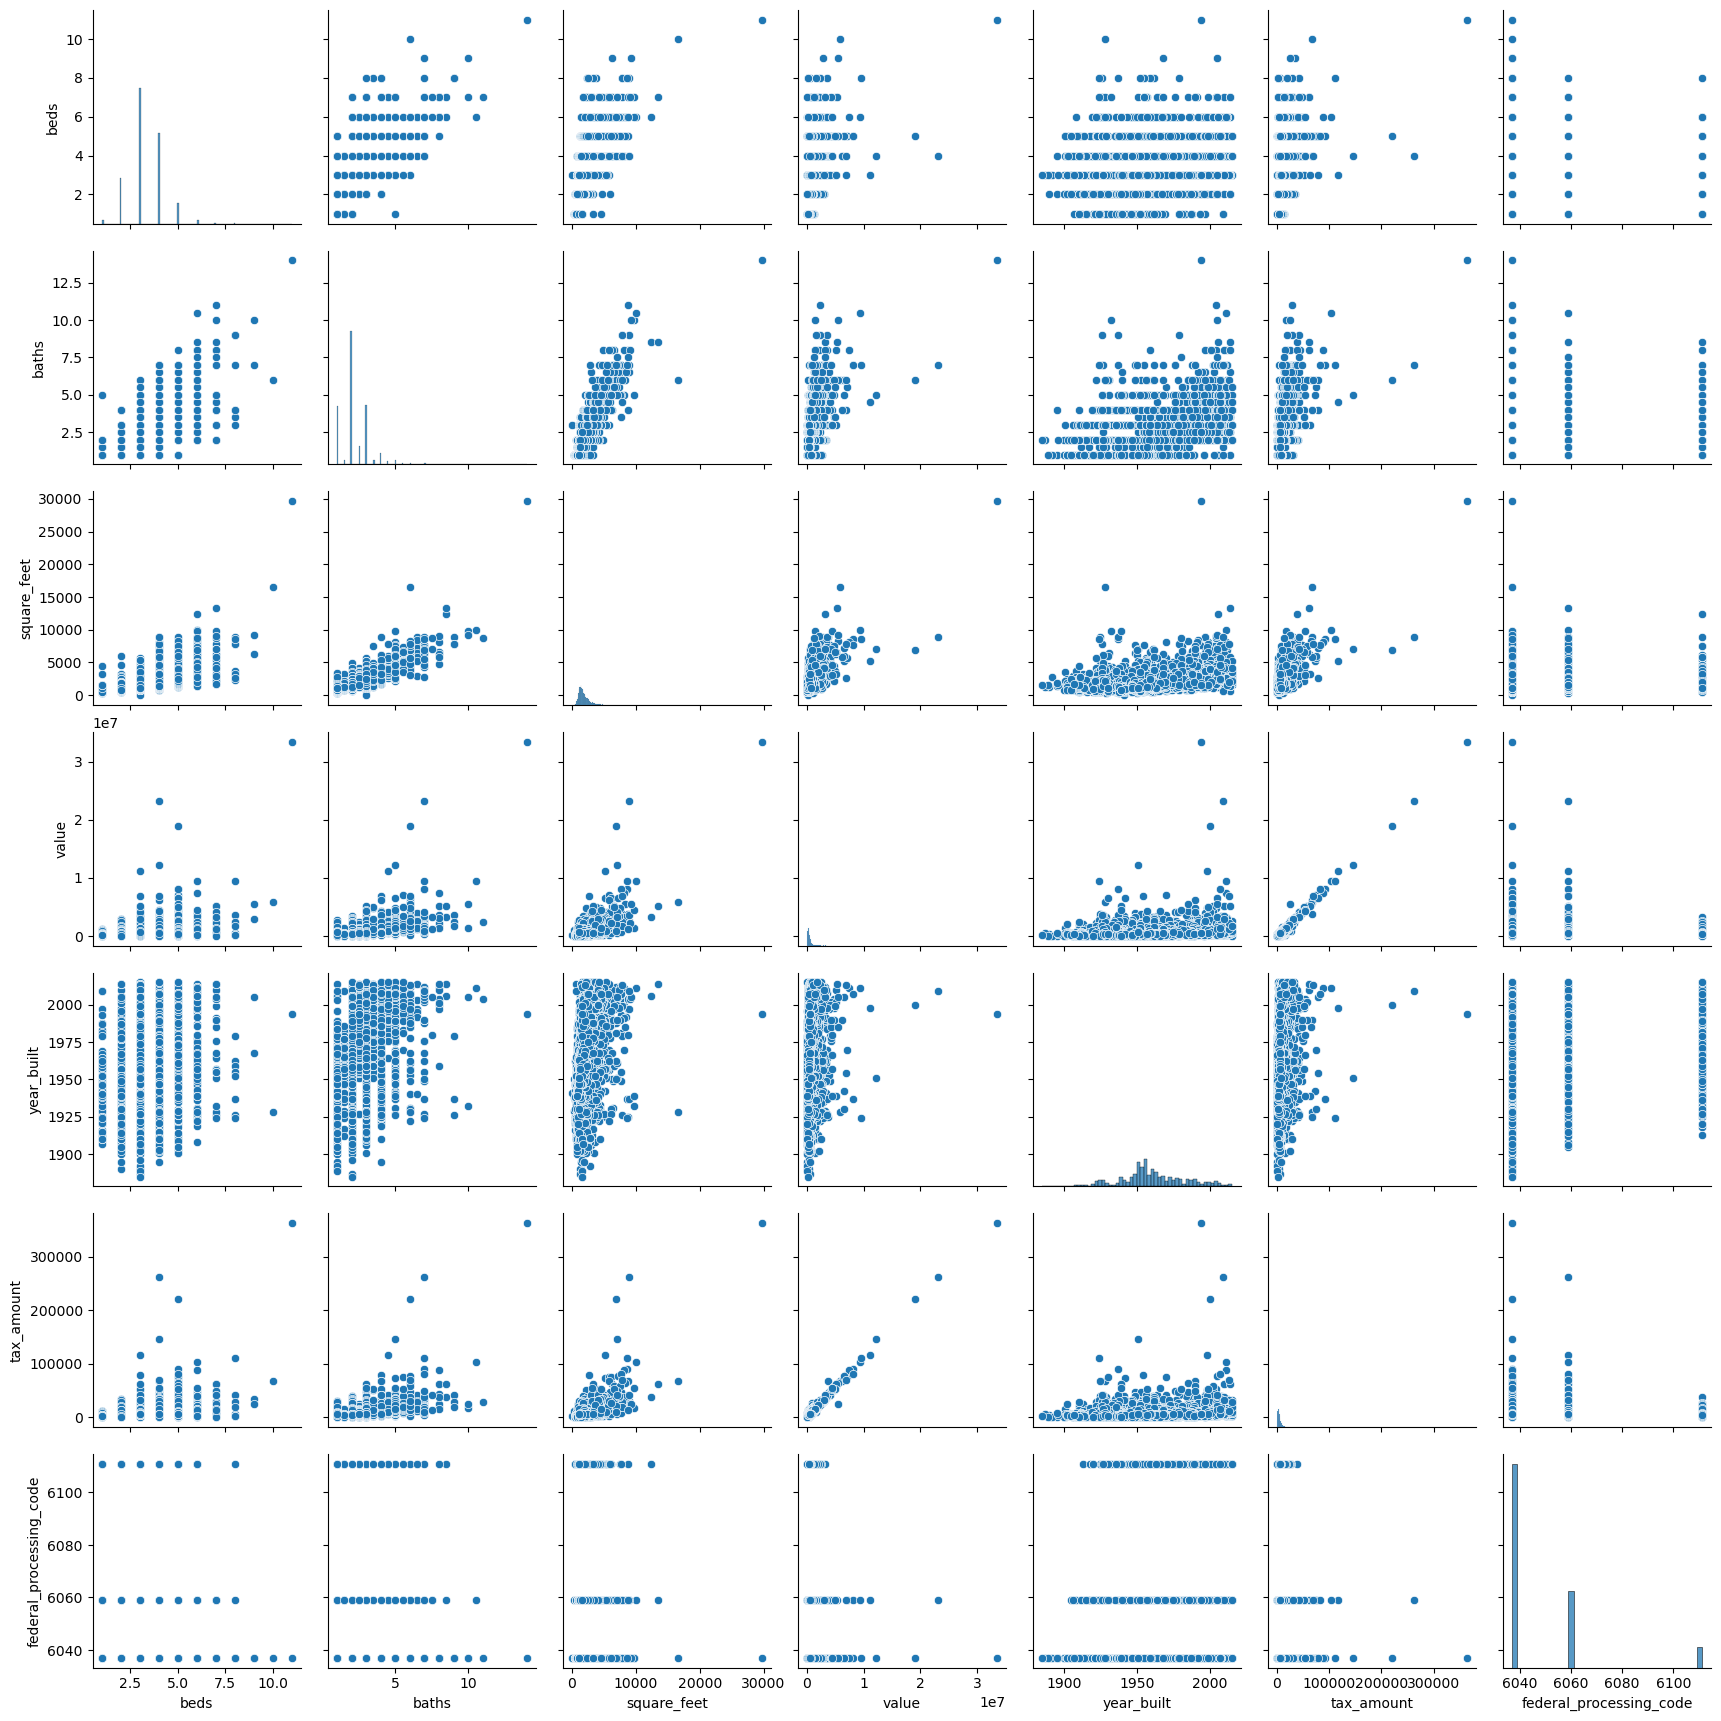

In [20]:
sns.pairplot(train.sample(10000))
plt.show()

## Run the appropriate statistical tests where needed.

In [16]:
r, p_value = pearsonr(train.square_feet, train.value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.6071742620657861
P-value: 0.0


In [17]:
r, p_value = pearsonr(train.baths, train.value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.5008269295908183
P-value: 0.0


In [18]:
r, p_value = pearsonr(train.beds, train.value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2554132318664107
P-value: 0.0


## What independent variables are correlated with the dependent variable, home value?

Leaving out tax amount, Square Feet has the largest correlation to home value with bathrooms following second.

## Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

The largest correlation between independent variables is bathrooms and square feet.

## Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Done.

## Explore your dataset with any other visualizations you think will be helpful.